In [ ]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import nltk
import string
import math
import re
%matplotlib inline
warnings.filterwarnings("ignore")
import re
import random
import pandas as pd
import urllib.request
import textwrap
from nltk.corpus import stopwords

# Creating the Function with 2 parameters
def partition(bi, la):
    url = f"http://www.gutenberg.org/files/{bi}/{bi}-0.txt" # Downloading the book from gutenberg website
    response = urllib.request.urlopen(url)
    raw_text = response.read().decode('utf-8')
    #cleaned_text = re.sub(r'\b\w*\d+\w*\b|\w*_\w*|(?<=\w)\'(?=\w)', '', raw_text)
    cleaned_text = re.sub(r'\r\n?', '\n', raw_text).strip()# Cleaning the text
    wo = re.findall(r'\w+', cleaned_text)# Splitting to list of words
    random.seed(42)
    starting_indices = random.sample(range(0, len(wo) - 100), 200)# Selecting 200 random starting indices for partitions
    partitions = []#creating empty list for partitions
    for i in starting_indices: #iterating through the starting indices
        partition = wo[i:i+100]
        partitions.append(partition)#appending each partition to the partitions list
    df = pd.DataFrame({'label': la, 'partition': partitions})# Creating a DF to store all the partitions
    return df #the dataframe is returned
bi_list = [1533,1754,1342,345,2446]# List of book ids on the website
la_list = ['a', 'b', 'c','d','e']
df_list = [] #empty lsit
for bi, la in zip(bi_list, la_list):
    df_list.append(partition(bi, la)) #function is being called inside and the values are appended
df = pd.concat(df_list)# Concatenating the DataFrames and exporting to CSV format
print(df)
df.to_csv('finaloutput.csv', index=False)

    label                                          partition
0       a  [are, legally, required, to, prepare, your, pe...
1       a  [_, SCENE, VI, The, same, Before, the, Castle,...
2       a  [worthy, gentleman, SOLDIER, As, whence, the, ...
3       a  [my, lord, MACBETH, I, ll, call, upon, you, st...
4       a  [MACBETH, We, hear, our, bloody, cousins, are,...
..    ...                                                ...
195     e  [surely, Dr, Stockmann, Aha, Calls, out, Come,...
196     e  [only, then, that, the, majority, recognises, ...
197     e  [like, a, flock, of, sheep, Captain, Horster, ...
198     e  [bag, of, tricks, are, probably, rampant, ther...
199     e  [Dr, Stockmann, Hovstad, It, is, no, good, mak...

[1000 rows x 2 columns]


In [ ]:
df.head()

,label,partition
0,a,"[are, legally, required, to, prepare, your, pe..."
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,..."
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ..."
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st..."
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,..."


In [ ]:
df['clean'] = df['partition'].apply(lambda x: ' '.join(map(str, x)))

In [ ]:
df

,label,partition,clean
0,a,"[are, legally, required, to, prepare, your, pe...",are legally required to prepare your periodic ...
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,...",_ SCENE VI The same Before the Castle Hautboys...
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthy gentleman SOLDIER As whence the sun gin...
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st...",my lord MACBETH I ll call upon you straight ab...
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,...",MACBETH We hear our bloody cousins are bestow ...
...,...,...,...
195,e,"[surely, Dr, Stockmann, Aha, Calls, out, Come,...",surely Dr Stockmann Aha Calls out Come in Mrs ...
196,e,"[only, then, that, the, majority, recognises, ...",only then that the majority recognises them an...
197,e,"[like, a, flock, of, sheep, Captain, Horster, ...",like a flock of sheep Captain Horster That is ...
198,e,"[bag, of, tricks, are, probably, rampant, ther...",bag of tricks are probably rampant there too B...


In [ ]:
df["clean"]=df["clean"].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))

In [ ]:
df["clean"] = df["clean"].apply(lambda x: " ".join(re.sub('[^0-9a-zA-Z]+', '', w) for w in x.split()))

In [ ]:
df

,label,partition,clean
0,a,"[are, legally, required, to, prepare, your, pe...",are legally required prepare your periodic tax...
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,...",SCENE The same Before the Castle Hautboys Serv...
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthy gentleman SOLDIER whence the sun gins h...
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st...",lord MACBETH call upon you straight abide with...
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,...",MACBETH hear our bloody cousins are bestow Eng...
...,...,...,...
195,e,"[surely, Dr, Stockmann, Aha, Calls, out, Come,...",surely Stockmann Aha Calls out Come Mrs Stockm...
196,e,"[only, then, that, the, majority, recognises, ...",only then that the majority recognises them an...
197,e,"[like, a, flock, of, sheep, Captain, Horster, ...",like flock sheep Captain Horster That what mou...
198,e,"[bag, of, tricks, are, probably, rampant, ther...",bag tricks are probably rampant there too But ...


In [ ]:
tokenizedtweet=df["clean"].apply(lambda x : x.split())
tokenizedtweet.head()

0    [are, legally, required, prepare, your, period...
1    [SCENE, The, same, Before, the, Castle, Hautbo...
2    [worthy, gentleman, SOLDIER, whence, the, sun,...
3    [lord, MACBETH, call, upon, you, straight, abi...
4    [MACBETH, hear, our, bloody, cousins, are, bes...
Name: clean, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer= PorterStemmer()
tokenizedtweet1=tokenizedtweet.apply(lambda x : [stemmer.stem(word) for word in x])
tokenizedtweet1.head()

0    [are, legal, requir, prepar, your, period, tax...
1    [scene, the, same, befor, the, castl, hautboy,...
2    [worthi, gentleman, soldier, whenc, the, sun, ...
3    [lord, macbeth, call, upon, you, straight, abi...
4    [macbeth, hear, our, bloodi, cousin, are, best...
Name: clean, dtype: object

In [ ]:
tokenizedtweet1=tokenizedtweet1.apply(lambda x : " ".join([i for i in x]))
tokenizedtweet1.head()

0    are legal requir prepar your period tax return...
1    scene the same befor the castl hautboy servant...
2    worthi gentleman soldier whenc the sun gin hi ...
3    lord macbeth call upon you straight abid withi...
4    macbeth hear our bloodi cousin are bestow engl...
Name: clean, dtype: object

In [ ]:
df["clean"]=tokenizedtweet1
df.head()

,label,partition,clean
0,a,"[are, legally, required, to, prepare, your, pe...",are legal requir prepar your period tax return...
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,...",scene the same befor the castl hautboy servant...
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthi gentleman soldier whenc the sun gin hi ...
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st...",lord macbeth call upon you straight abid withi...
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,...",macbeth hear our bloodi cousin are bestow engl...


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\goluk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\goluk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()
tokenizedtweet2=tokenizedtweet.apply(lambda x : [lemmatizer.lemmatize(word) for word in x])
tokenizedtweet2.head()

0    [are, legally, required, prepare, your, period...
1    [SCENE, The, same, Before, the, Castle, Hautbo...
2    [worthy, gentleman, SOLDIER, whence, the, sun,...
3    [lord, MACBETH, call, upon, you, straight, abi...
4    [MACBETH, hear, our, bloody, cousin, are, best...
Name: clean, dtype: object

In [ ]:
tokenizedtweet2=tokenizedtweet2.apply(lambda x : " ".join([i for i in x]))
tokenizedtweet2.head()

0    are legally required prepare your periodic tax...
1    SCENE The same Before the Castle Hautboys Serv...
2    worthy gentleman SOLDIER whence the sun gin hi...
3    lord MACBETH call upon you straight abide with...
4    MACBETH hear our bloody cousin are bestow Engl...
Name: clean, dtype: object

In [ ]:
df["clean_lem"]=tokenizedtweet2
df.head()

,label,partition,clean,clean_lem
0,a,"[are, legally, required, to, prepare, your, pe...",are legal requir prepar your period tax return...,are legally required prepare your periodic tax...
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,...",scene the same befor the castl hautboy servant...,SCENE The same Before the Castle Hautboys Serv...
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthi gentleman soldier whenc the sun gin hi ...,worthy gentleman SOLDIER whence the sun gin hi...
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st...",lord macbeth call upon you straight abid withi...,lord MACBETH call upon you straight abide with...
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,...",macbeth hear our bloodi cousin are bestow engl...,MACBETH hear our bloody cousin are bestow Engl...


In [ ]:
df['clean_lem'] = df['clean_lem'].apply(lambda x: x.lower())

In [ ]:
df.head()

,label,partition,clean,clean_lem
0,a,"[are, legally, required, to, prepare, your, pe...",are legal requir prepar your period tax return...,are legally required prepare your periodic tax...
1,a,"[_, SCENE, VI, The, same, Before, the, Castle,...",scene the same befor the castl hautboy servant...,scene the same before the castle hautboys serv...
2,a,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthi gentleman soldier whenc the sun gin hi ...,worthy gentleman soldier whence the sun gin hi...
3,a,"[my, lord, MACBETH, I, ll, call, upon, you, st...",lord macbeth call upon you straight abid withi...,lord macbeth call upon you straight abide with...
4,a,"[MACBETH, We, hear, our, bloody, cousins, are,...",macbeth hear our bloodi cousin are bestow engl...,macbeth hear our bloody cousin are bestow engl...


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

In [ ]:
df.head()

,label,partition,clean,clean_lem
0,0,"[are, legally, required, to, prepare, your, pe...",are legal requir prepar your period tax return...,are legally required prepare your periodic tax...
1,0,"[_, SCENE, VI, The, same, Before, the, Castle,...",scene the same befor the castl hautboy servant...,scene the same before the castle hautboys serv...
2,0,"[worthy, gentleman, SOLDIER, As, whence, the, ...",worthi gentleman soldier whenc the sun gin hi ...,worthy gentleman soldier whence the sun gin hi...
3,0,"[my, lord, MACBETH, I, ll, call, upon, you, st...",lord macbeth call upon you straight abid withi...,lord macbeth call upon you straight abide with...
4,0,"[MACBETH, We, hear, our, bloody, cousins, are,...",macbeth hear our bloodi cousin are bestow engl...,macbeth hear our bloody cousin are bestow engl...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer()

In [ ]:
bow=bow_vectorizer.fit_transform(df["clean"])

In [ ]:
bow_l=bow_vectorizer.fit_transform(df["clean_lem"]) #run this or above

In [ ]:
stemmed_accuracies_bow = []
stemmed_accuracies_tf = []
lem_accuracies_bow = []
lem_accuracies_tf = []

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
le=LogisticRegression()

In [ ]:
from sklearn.model_selection import KFold
def modeltype(model,b,labels, n_splits=10):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    accuracy = []
    for train_index, test_index in kfold.split(b):
        X_train, X_test = b[train_index], b[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model.fit(X_train, y_train)
        accuracy.append(model.score(X_test, y_test))
    return np.mean(accuracy)
labels = df["label"].to_numpy()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def modeltypefinal(model,b,labels, n_splits=10):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=0)
    accuracy = []
    c=[]
    reports=[]
    for train_index, test_index in kfold.split(b):
        X_train, X_test = b[train_index], b[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test)
        cm=confusion_matrix(y_test,y_pred)
        reports.append(classification_report(y_test, y_pred))
        c.append(cm)
        accuracy.append(model.score(X_test, y_test))
    return np.mean(accuracy),c,reports
labels = df["label"].to_numpy()

In [ ]:
cv_accuracy = modeltype(le,bow,labels)#STEMMING, BAG OF WORDS
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.882


In [ ]:
cv_accuracy = modeltype(le,bow_l,labels)#LEMMATIZATION, BAG OF WORDS
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.882


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
t=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words="english",use_idf=True,ngram_range=(1,2))

In [ ]:
tf=t.fit_transform(df["clean"])

In [ ]:
cv_accuracy,c,reports = modeltypefinal(le,tf,labels)#STEMMING, TF-IDF with LOGISTIC REGRESSION IS OUR BEST MODEL
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.9149999999999998
CONFUSION MATRIX
[[11  1  0  0  1]
 [ 3 25  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 21  0]
 [ 1  1  0  1 14]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.89      0.91        28
           2       1.00      1.00      1.00        21
           3       0.95      1.00      0.98        21
           4       0.93      0.82      0.87        17

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
tf_l=t.fit_transform(df["clean_lem"])

In [ ]:
cv_accuracy = modeltype(le,tf_l,labels)#LEMMATIZATION TFIDF
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.909


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cv_accuracy,c,reports = modeltypefinal(classifier,tf,labels)#STEMMING, TF-IDF
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.8230000000000001
CONFUSION MATRIX
[[ 9  3  1  0  0]
 [ 1 24  1  1  1]
 [ 0  1 16  4  0]
 [ 0  2  3 16  0]
 [ 0  1  0  0 16]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.77      0.86      0.81        28
           2       0.76      0.76      0.76        21
           3       0.76      0.76      0.76        21
           4       0.94      0.94      0.94        17

    accuracy                           0.81       100
   macro avg       0.83      0.80      0.81       100
weighted avg       0.81      0.81      0.81       100



In [ ]:
cv_accuracy = modeltype(classifier,tf_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.787


In [ ]:
cv_accuracy = modeltype(classifier,bow,labels)
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.7689999999999999


In [ ]:
cv_accuracy = modeltype(classifier,bow_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.762


In [ ]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=5)
cv_accuracy = modeltype(r,bow,labels)
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.745


In [ ]:
cv_accuracy = modeltype(r,bow_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.739


In [ ]:
cv_accuracy,c,reports = modeltypefinal(r,tf,labels)#STEMMING, TF-IDF
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.8470000000000001
CONFUSION MATRIX
[[10  1  1  0  1]
 [ 2 23  0  2  1]
 [ 0  1 19  1  0]
 [ 1  2  0 18  0]
 [ 1  2  0  0 14]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.79      0.82      0.81        28
           2       0.95      0.90      0.93        21
           3       0.86      0.86      0.86        21
           4       0.88      0.82      0.85        17

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [ ]:
cv_accuracy = modeltype(r,tf_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.837


In [ ]:
from sklearn.svm import SVC
s= SVC(kernel='linear', random_state=0)  
cv_accuracy = modeltype(s,bow,labels)
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.874


In [ ]:
cv_accuracy = modeltype(s,bow_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.875


In [ ]:
cv_accuracy,c,reports = modeltypefinal(s,tf,labels)#STEMMING, TF-IDF
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by changing the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by changing the number it can be shown for every fold

Mean Accuracy: 0.9119999999999999
CONFUSION MATRIX
[[11  2  0  0  0]
 [ 3 25  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  1 20  0]
 [ 1  1  0  0 15]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.89      0.89      0.89        28
           2       0.95      1.00      0.98        21
           3       1.00      0.95      0.98        21
           4       1.00      0.88      0.94        17

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.92      0.92       100



In [ ]:
cv_accuracy = modeltype(s,tf_l,labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.907


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cv_accuracy = modeltype(gnb,bow.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.887


In [ ]:
cv_accuracy = modeltype(gnb,bow_l.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.882


In [ ]:
cv_accuracy,c,reports = modeltypefinal(gnb,tf.todense(),labels)#STEMMING, TF-IDF
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.889
CONFUSION MATRIX
[[10  2  0  0  1]
 [ 1 25  0  0  2]
 [ 0  0 21  0  0]
 [ 0  0  1 20  0]
 [ 1  1  0  0 15]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.89      0.89      0.89        28
           2       0.95      1.00      0.98        21
           3       1.00      0.95      0.98        21
           4       0.83      0.88      0.86        17

    accuracy                           0.91       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
cv_accuracy = modeltype(gnb,tf_l.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.876


In [ ]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
cv_accuracy = modeltype(model,bow.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
stemmed_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.843


In [ ]:
cv_accuracy = modeltype(model,bow_l.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_bow.append(cv_accuracy*100)

Mean Accuracy: 0.844


In [ ]:
cv_accuracy,c,reports = modeltypefinal(model,tf.todense(),labels)#STEMMING, TF-IDF
stemmed_accuracies_tf.append(cv_accuracy*100)
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.873
CONFUSION MATRIX
[[ 9  2  1  0  1]
 [ 1 24  1  0  2]
 [ 0  0 19  2  0]
 [ 0  0  0 21  0]
 [ 0  2  0  0 15]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.86      0.86      0.86        28
           2       0.90      0.90      0.90        21
           3       0.91      1.00      0.95        21
           4       0.83      0.88      0.86        17

    accuracy                           0.88       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100



In [ ]:
cv_accuracy = modeltype(model,tf_l.todense(),labels)
print("Mean Accuracy:", cv_accuracy)
lem_accuracies_tf.append(cv_accuracy*100)

Mean Accuracy: 0.869


# CHAMPION MODEL

In [ ]:
cv_accuracy = modeltype(le,tf,labels) #OUR BEST MODEL - TF-IDF WITH LOGISTIC REGRESSION AND STEMMING
print("Mean Accuracy:", cv_accuracy)

Mean Accuracy: 0.912


In [ ]:
cv_accuracy,c,reports = modeltypefinal(le,tf,labels)#STEMMING, TF-IDF with LOGISTIC REGRESSION IS OUR BEST MODEL
print("Mean Accuracy:", cv_accuracy)
print("CONFUSION MATRIX")
print(c[0]) #printing only the first fold by canging the number it can be shown for every fold
print("CLASSIFICATION REPORT")
print(reports[0]) #printing only the first fold by canging the number it can be shown for every fold

Mean Accuracy: 0.9149999999999998
CONFUSION MATRIX
[[11  1  0  0  1]
 [ 3 25  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 21  0]
 [ 1  1  0  1 14]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.93      0.89      0.91        28
           2       1.00      1.00      1.00        21
           3       0.95      1.00      0.98        21
           4       0.93      0.82      0.87        17

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



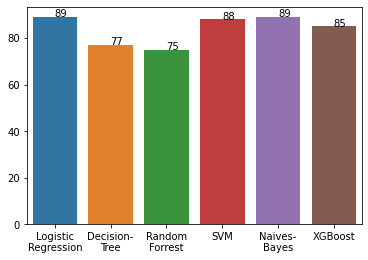

In [ ]:
#visualizing the accuracies of the classifier alogirthms with stemmed data with bow

x = ['Logistic Regression', 'Decision-Tree', 'Random Forrest', 'SVM', 'Naives-Bayes', 'XGBoost']
y = stemmed_accuracies_bow

x = [textwrap.fill(label, 10) for label in x]
y = [math.ceil(accuracy) for accuracy in stemmed_accuracies_bow]

sns.barplot(x, y)
for i, v in enumerate(y): plt.text(i, v + 0.1, str(v))
plt.show()

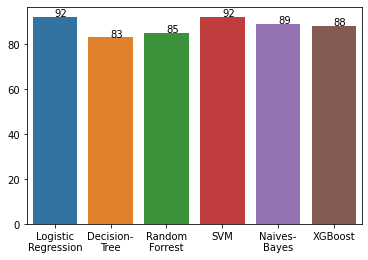

In [ ]:
#visualizing the accuracies of the classifier alogirthms with stemmed data with tf

y = stemmed_accuracies_tf

y = [math.ceil(accuracy) for accuracy in stemmed_accuracies_tf]

sns.barplot(x, y)
for i, v in enumerate(y): plt.text(i, v + 0.1, str(v))
plt.show()

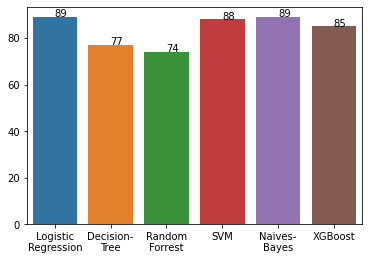

In [ ]:
#visualizing the accuracies of the classifier alogirthms with lematized data with bow

y = lem_accuracies_bow

y = [math.ceil(accuracy) for accuracy in lem_accuracies_bow]

sns.barplot(x, y)
for i, v in enumerate(y): plt.text(i, v + 0.1, str(v))
plt.show()

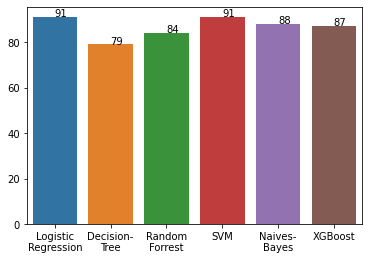

In [ ]:
#visualizing the accuracies of the classifier alogirthms with lematized data with tf

y = lem_accuracies_tf

y = [math.ceil(accuracy) for accuracy in lem_accuracies_tf]

sns.barplot(x, y)
for i, v in enumerate(y): plt.text(i, v + 0.1, str(v))
plt.show()

<AxesSubplot:>

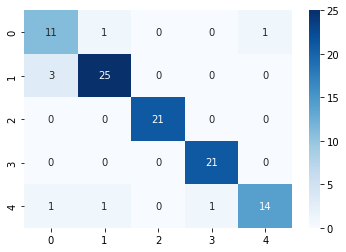

In [ ]:
sns.heatmap(c[0], annot=True, cmap='Blues')